<a href="https://colab.research.google.com/github/nestorfranca/Algorithms_and_Data_Structure/blob/main/Rede_Convolucionais_100_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt


In [2]:
(dados_treino, classes_treino), (dados_teste, classes_teste) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'veado',
#                'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

# numeros_figuras = 25
# plt.figure(figsize = (10, 10))
# for i in range(numeros_figuras):
#     plt.subplot(5, 5, i+1)
#     plt.imshow(dados_treino[i])
#     plt.title(class_names[classes_treino[i][0]])
#     plt.axis('off')
# # plt.tight_layout()
# # plt.show()

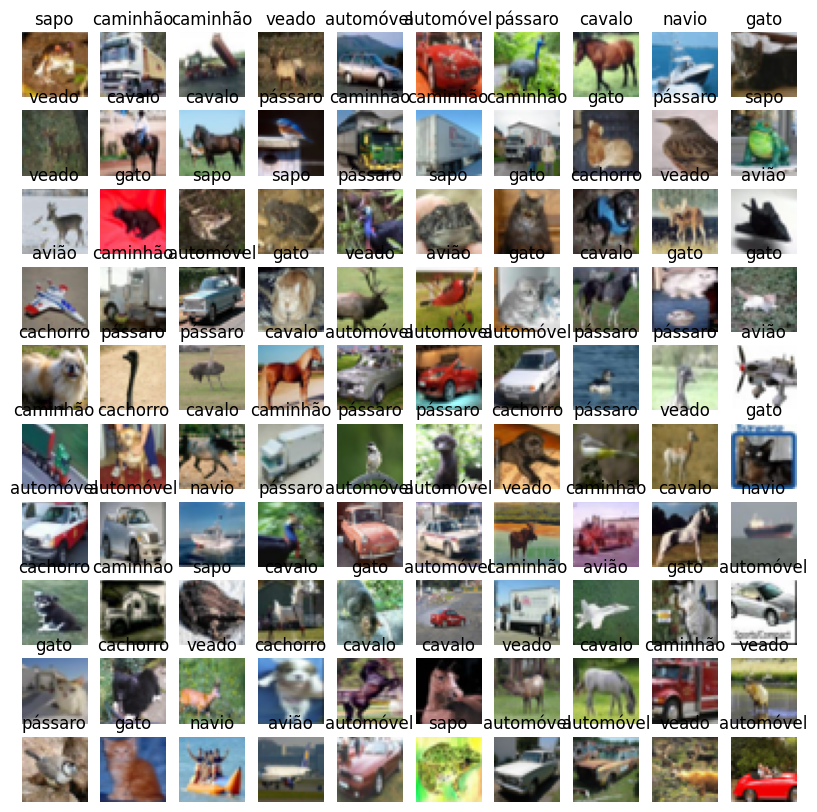

In [4]:
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'veado',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

numeros_figuras = 100
parametro = 10
plt.figure(figsize = (10, 10))
for i in range(numeros_figuras):
    plt.subplot(parametro, parametro, i+1)
    plt.imshow(dados_treino[i])
    plt.title(class_names[classes_treino[i][0]])
    plt.axis('off')
# plt.tight_layout()
# plt.show()

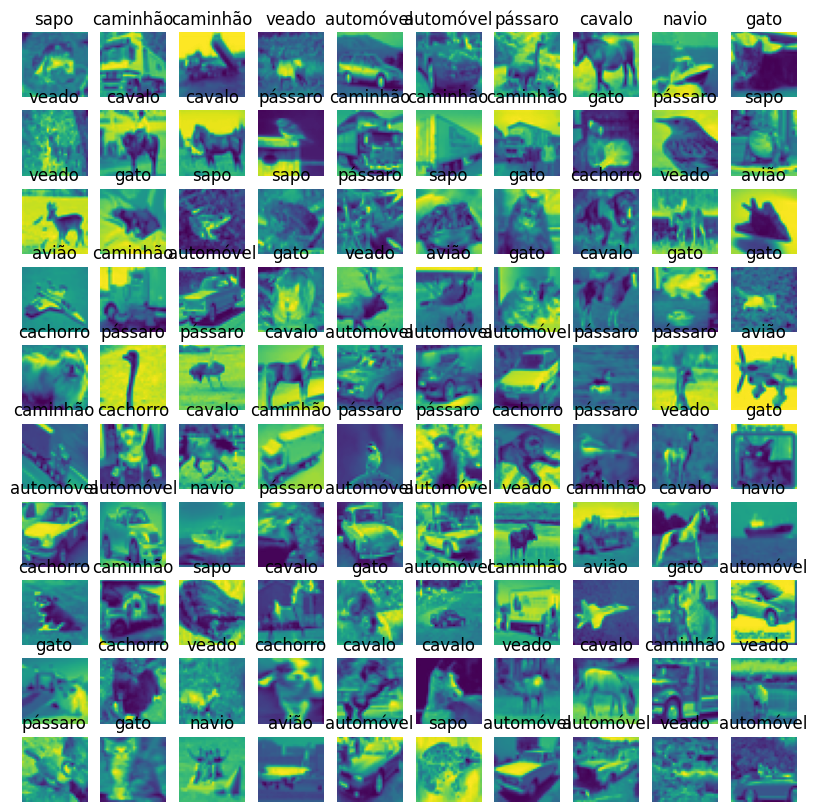

In [5]:
## Normalize input from 0-255 to 0.0-1.0
dados_treino = dados_treino.astype('float32')
dados_teste = dados_teste.astype('float32')
dados_treino = dados_treino / 255.0
dados_teste = dados_teste / 255.0

dados_treino = np.dot(dados_treino[...,:3], [0.299, 0.587, 0.114])
dados_teste = np.dot(dados_teste[...,:3], [0.299, 0.587, 0.114])

# add empty color dimension
dados_treino = np.expand_dims(dados_treino, -1)
dados_teste = np.expand_dims(dados_teste, -1)

# Resultado
plt.figure(figsize = (10, 10))
for i in range(numeros_figuras):
    plt.subplot(parametro, parametro, i+1)
    plt.imshow(dados_treino[i])
    plt.title(class_names[classes_treino[i][0]])
    plt.axis('off')

In [6]:
# Split the dataset into train and valid
s = StratifiedShuffleSplit(n_splits = 5, random_state = 0, test_size = 0.2)
train_index, valid_index = next(s.split(dados_treino, classes_treino))

dados_validacao, classes_validacao = dados_treino[valid_index], classes_treino[valid_index]
dados_treino, classes_treino = dados_treino[train_index], classes_treino[train_index]


In [7]:
# model com 3 camadas convolucionais
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape = dados_treino.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))


# Para a camada totalmente conectada
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(dados_treino, classes_treino, epochs = 10, batch_size = 128, validation_data = (dados_validacao, classes_validacao))

Epoch 1/10
313/313 [==============================] - 22s 24ms/step - loss: 1.5538 - accuracy: 0.4577 - val_loss: 1.3128 - val_accuracy: 0.5454
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 1.2022 - accuracy: 0.5826 - val_loss: 1.0579 - val_accuracy: 0.6322
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 1.0518 - accuracy: 0.6373 - val_loss: 0.9526 - val_accuracy: 0.6740
Epoch 4/10
313/313 [==============================] - 7s 22ms/step - loss: 0.9522 - accuracy: 0.6707 - val_loss: 0.9537 - val_accuracy: 0.6718
Epoch 5/10
313/313 [==============================] - 8s 25ms/step - loss: 0.8739 - accuracy: 0.6926 - val_loss: 0.8614 - val_accuracy: 0.7104
Epoch 6/10
313/313 [==============================] - 7s 23ms/step - loss: 0.8020 - accuracy: 0.7190 - val_loss: 0.8703 - val_accuracy: 0.7103
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 0.7302 - accuracy: 0.7424 - val_loss: 0.8931 - val_accuracy: 0.692

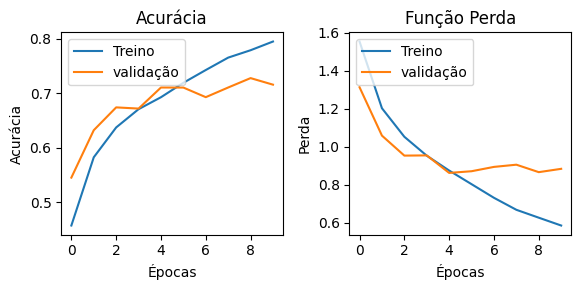

In [10]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'validação'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend(['Treino', 'validação'], loc='upper left')

plt.tight_layout()

In [11]:
# Acuracia nos dados de teste

scores = model.evaluate(dados_teste, classes_teste)
print('Acuracia: %.f%%' % (scores[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.8967 - accuracy: 0.7134
Acuracia: 71%


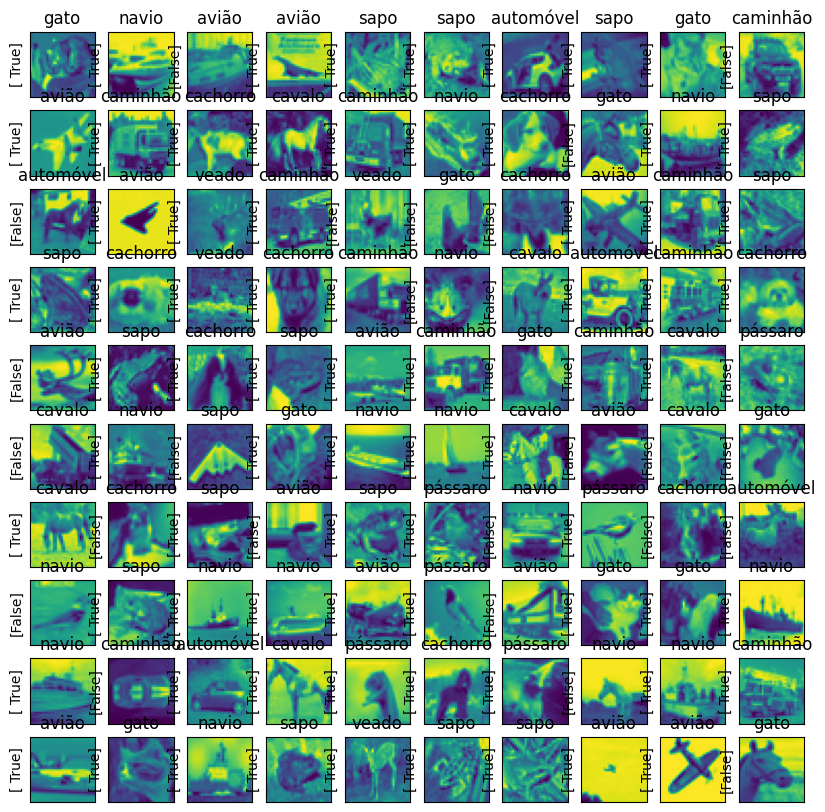

In [12]:
fig = plt.figure(figsize = (10, 10))
for i in range(numeros_figuras):
    ax = fig.add_subplot(parametro, parametro, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(dados_teste[i]))
    predict = np.argmax(model.predict(dados_teste[i].reshape(1, 32, 32, 1), verbose = 0)[0], axis = -1)
    ax.set_title("{}".format(class_names[predict]))
    #ax.set_xlabel("{}".format(classes[y_teste[i]]))
    ax.set_ylabel("{}".format(predict == classes_teste[i]))